# Tranfered value VS mining reward comparison 

Estimate the value in USD transfered in blocks VS value in USD provided as mining reward (fee + block reward)

Data sources:
* https://www.blockchain.com/charts
* https://www.blockchain.com/charts/estimated-transaction-volume?timespan=1year
* https://www.blockchain.com/charts/estimated-transaction-volume-usd?timespan=1year
* https://www.blockchain.com/charts/miners-revenue?timespan=1year
* https://www.blockchain.com/charts/transaction-fees?timespan=1year

In [74]:
import pandas as pd
pd.set_option('display.precision', 100)
import numpy as np
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Transaction volume per day in USD
> The Estimated Transaction Value in USD value.

https://www.blockchain.com/charts/estimated-transaction-volume-usd?timespan=1year

In [4]:
!wget -O "estimated-transaction-volume-usd.csv"  "https://api.blockchain.info/charts/estimated-transaction-volume-usd?timespan=1year&format=csv"

--2019-10-15 15:38:33--  https://api.blockchain.info/charts/estimated-transaction-volume-usd?timespan=1year&format=csv
Resolving api.blockchain.info (api.blockchain.info)... 104.16.55.3, 104.16.54.3
Connecting to api.blockchain.info (api.blockchain.info)|104.16.55.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘estimated-transaction-volume-usd.csv’

estimated-transacti     [ <=>                ]  13.66K  --.-KB/s    in 0.001s  

2019-10-15 15:38:33 (13.5 MB/s) - ‘estimated-transaction-volume-usd.csv’ saved [13992]



In [12]:
df_vol = pd.read_csv('estimated-transaction-volume-usd.csv',header=None)
print(len(df_vol))
df_vol.head()

365


,0,1
0,2018-10-15 00:00:00,1397520263.45377254486083984375000
1,2018-10-16 00:00:00,903556367.08799004554748535156250
2,2018-10-17 00:00:00,728506819.17753159999847412109375
3,2018-10-18 00:00:00,877725432.40643978118896484375000
4,2018-10-19 00:00:00,839318447.66251254081726074218750


In [13]:
min_volume = df_vol[1].min()
print('Min:\n$ {:>20,.2f} USD'.format(min_volume))
max_volume = df_vol[1].max()
print('Max:\n$ {:>20,.2f} USD'.format(max_volume))
median_volume = df_vol[1].median()
print('Median:\n$ {:>20,.2f} USD'.format(median_volume))
mean_volume = df_vol[1].mean()
print('Mean:\n$ {:>20,.2f} USD'.format(mean_volume))

Min:
$       223,086,857.01 USD
Max:
$     4,044,689,274.53 USD
Median:
$       782,426,488.16 USD
Mean:
$       941,545,178.25 USD


## Miner reveneu per day in USD
> Total value of coinbase block rewards and transaction fees paid to miners.

https://www.blockchain.com/charts/miners-revenue?timespan=1year

In [26]:
!wget -O "miners-revenue.csv" "https://api.blockchain.info/charts/miners-revenue?timespan=1year&format=csv"

--2019-10-15 16:14:56--  https://api.blockchain.info/charts/miners-revenue?timespan=1year&format=csv
Resolving api.blockchain.info (api.blockchain.info)... 104.16.54.3, 104.16.55.3
Connecting to api.blockchain.info (api.blockchain.info)|104.16.54.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘miners-revenue.csv’

miners-revenue.csv      [ <=>                ]  13.66K  --.-KB/s    in 0.002s  

2019-10-15 16:14:56 (8.23 MB/s) - ‘miners-revenue.csv’ saved [13985]



In [27]:
df_rev = pd.read_csv('miners-revenue.csv',header=None)
print(len(df_rev))
df_rev.head()

365


,0,1
0,2018-10-15 00:00:00,13215486.35126505978405475616455078125
1,2018-10-16 00:00:00,11259236.32218853943049907684326171875
2,2018-10-17 00:00:00,11502916.70056558959186077117919921875
3,2018-10-18 00:00:00,11448484.29383384063839912414550781250
4,2018-10-19 00:00:00,11629773.63004752434790134429931640625


In [28]:
min_revenue = df_rev[1].min()
print('Min:\n$ {:>20,.2f} USD'.format(min_revenue))
max_revenue = df_rev[1].max()
print('Max:\n$ {:>20,.2f} USD'.format(max_revenue))
median_revenue = df_rev[1].median()
print('Median:\n$ {:>20,.2f} USD'.format(median_revenue))
mean_revenue = df_rev[1].mean()
print('Mean:\n$ {:>20,.2f} USD'.format(mean_revenue))

Min:
$         4,750,978.91 USD
Max:
$        28,500,796.50 USD
Median:
$        11,207,341.46 USD
Mean:
$        12,921,474.08 USD


## Transaction feeds per day in USD
> The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).

https://www.blockchain.com/charts/transaction-fees-usd?timespan=1year

In [23]:
!wget -O "transaction-fees-usd.csv"  "https://api.blockchain.info/charts/transaction-fees-usd?timespan=1year&format=csv"

--2019-10-15 16:13:50--  https://api.blockchain.info/charts/transaction-fees-usd?timespan=1year&format=csv
Resolving api.blockchain.info (api.blockchain.info)... 104.16.54.3, 104.16.55.3
Connecting to api.blockchain.info (api.blockchain.info)|104.16.54.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘transaction-fees-usd.csv’

transaction-fees-us     [ <=>                ]  13.68K  --.-KB/s    in 0.001s  

2019-10-15 16:13:50 (12.6 MB/s) - ‘transaction-fees-usd.csv’ saved [14006]



In [30]:
df_rev = pd.read_csv('transaction-fees-usd.csv',header=None)
print(len(df_rev))
df_rev.head()

365


,0,1
0,2018-10-15 00:00:00,149028.726265063916798681020736694335937500
1,2018-10-16 00:00:00,127442.884688540390925481915473937988281250
2,2018-10-17 00:00:00,124340.335180975103867240250110626220703125
3,2018-10-18 00:00:00,118613.966910766539513133466243743896484375
4,2018-10-19 00:00:00,114560.234214190510101616382598876953125000


In [31]:
min_fee = df_rev[1].min()
print('Min:\n฿ {:>20,.8f} BTC'.format(min_fee))
max_fee = df_rev[1].max()
print('Max:\n฿ {:>20,.8f} BTC'.format(max_fee))
median_fee = df_rev[1].median()
print('Median:\n฿ {:>20,.8f} BTC'.format(median_fee))
mean_fee = df_rev[1].mean()
print('Mean:\n฿ {:>20,.8f} BTC'.format(mean_fee))

Min:
฿      42,133.14971120 BTC
Max:
฿   2,368,023.05355289 BTC
Median:
฿     227,726.85373094 BTC
Mean:
฿     403,648.86033257 BTC


## Comparision of rewards (USD) and vlaue tranfered (USD) per day 


In [34]:
mean_volume / mean_revenue

72.86670021635685

In [35]:
median_volume / median_revenue

69.8137458396992

In [36]:
mean_volume / mean_fee

2332.5847556669914

In [37]:
median_volume / median_fee

3435.811259609016

## Transaction volume per day in BTC
> The total estimated value of transactions on the Bitcoin blockchain (does not include coins returned to sender as change).

https://www.blockchain.com/charts/estimated-transaction-volume?timespan=1year

In [2]:
!wget -O "estimated-transaction-volume.csv"  "https://api.blockchain.info/charts/estimated-transaction-volume?timespan=1year&format=csv"

--2019-10-15 15:33:07--  https://api.blockchain.info/charts/estimated-transaction-volume?timespan=1year&format=csv
Resolving api.blockchain.info (api.blockchain.info)... 104.16.55.3, 104.16.54.3
Connecting to api.blockchain.info (api.blockchain.info)|104.16.55.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘estimated-transaction-volume.csv’

estimated-transacti     [ <=>                ]  13.57K  --.-KB/s    in 0.001s  

2019-10-15 15:33:07 (15.3 MB/s) - ‘estimated-transaction-volume.csv’ saved [13900]



In [131]:
df_vol = pd.read_csv('estimated-transaction-volume.csv',header=None)
print(len(df_vol))
df_vol.head()

365


,0,1
0,2017-08-18 00:00:00,275331.80887692997930571436882019042968750
1,2017-08-19 00:00:00,313472.69392997998511418700218200683593750
2,2017-08-20 00:00:00,181583.87597230999381281435489654541015625
3,2017-08-21 00:00:00,202649.23936119000427424907684326171875000
4,2017-08-22 00:00:00,215933.01456173000042326748371124267578125


In [132]:
min_revenue = df_vol[1].min()
print('Min:\n฿ {:>20,.8f} BTC'.format(min_revenue))
max_revenue = df_vol[1].max()
print('Max:\n฿ {:>20,.8f} BTC'.format(max_revenue))
median_revenue = df_vol[1].median()
print('Median:\n฿ {:>20,.8f} BTC'.format(median_revenue))
mean_revenue = df_vol[1].mean()
print('Mean:\n฿ {:>20,.8f} BTC'.format(mean_revenue))

Min:
฿      52,417.41808258 BTC
Max:
฿     407,836.91191003 BTC
Median:
฿     156,169.96115303 BTC
Mean:
฿     173,139.73753751 BTC


## Transaction fees per day in BTC
> The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).

https://www.blockchain.com/charts/transaction-fees?timespan=1year

In [6]:
!wget -O "transaction-fees.csv" "https://api.blockchain.info/charts/transaction-fees?timespan=1year&format=csv"

--2019-10-15 15:41:24--  https://api.blockchain.info/charts/transaction-fees?timespan=1year&format=csv
Resolving api.blockchain.info (api.blockchain.info)... 104.16.54.3, 104.16.55.3
Connecting to api.blockchain.info (api.blockchain.info)|104.16.54.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘transaction-fees.csv’

transaction-fees.cs     [ <=>                ]  13.28K  --.-KB/s    in 0.001s  

2019-10-15 15:41:24 (14.0 MB/s) - ‘transaction-fees.csv’ saved [13597]



In [92]:
df_rev = pd.read_csv('transaction-fees.csv',header=None)
print(len(df_rev))
df_rev.head()

365


,0,1
0,2018-10-15 00:00:00,23.0960203100000036613437259802594780921936035...
1,2018-10-16 00:00:00,19.3194267500000016468675312353298068046569824...
2,2018-10-17 00:00:00,18.8500802999999876874426263384521007537841796...
3,2018-10-18 00:00:00,18.0592616700000014873239706503227353096008300...
4,2018-10-19 00:00:00,17.6587622599999995998132362728938460350036621...


In [95]:
min_revenue = df_rev[1].min()
print('Min:\n฿ {:>20,.8f} BTC'.format(min_revenue))
max_revenue = df_rev[1].max()
print('Max:\n฿ {:>20,.8f} BTC'.format(max_revenue))
median_revenue = df_rev[1].median()
print('Median:\n฿ {:>20,.8f} BTC'.format(median_revenue))
mean_revenue = df_rev[1].mean()
print('Mean:\n฿ {:>20,.8f} BTC'.format(mean_revenue))
std_revenue = df_rev[1].std()
print('Std. deviation:\n฿ {:>20,.8f} BTC'.format(std_revenue))

Min:
฿          11.22870449 BTC
Max:
฿         228.51579452 BTC
Median:
฿          34.64137449 BTC
Mean:
฿          53.60362910 BTC
Std. deviation:
฿          46.12188263 BTC


In [96]:
mean_block_interval = 60*10
mean_block_interval

600

In [97]:
seconds_per_day = 60*60*24
seconds_per_day

86400

In [98]:
mean_revenue

53.60362909619178

What is the mean number of Bitcoin blocks that are found in one day?

In [116]:
mean_blocks_per_day = seconds_per_day / mean_block_interval
mean_blocks_per_day

144.0

In [100]:
mean_fee_per_block = mean_revenue / mean_blocks_per_day 
print('Mean fee per block (derived by mean fee per day over the last year):\n฿ {:>20,.8f} BTC'.format(mean_fee_per_block))

Mean fee per block (derived by mean fee per day over the last year):
฿           0.37224742 BTC


Since the Bitcoin block arrival follows a Poisson distribution we have it that $ \lambda = Var[x] = E[x] $ the std. deviation is $ \sqrt{Var[x]} $ whis is 

In [101]:
math.sqrt((60*24)/10)

12.0

In [102]:
s=0
for i in range(1,200):
    # print the probability of finding exactly i blocks 
    # during a period of 1440 minutes (= 1 day) at 10 minute intervals 
    p = scipy.stats.poisson.pmf(i,(60*24)/10) 
    s += p
    print(i,"\t",p)
print()
print(s) # sums up to one

1 	 4.168282048773564e-61
2 	 3.0011630751169687e-59
3 	 1.4405582760561522e-57
4 	 5.186009793802143e-56
5 	 1.4935708206149958e-54
6 	 3.584569969476002e-53
7 	 7.373972508636301e-52
8 	 1.3273150515545492e-50
9 	 2.1237040824872642e-49
10 	 3.058133878781698e-48
11 	 4.0033752594960164e-47
12 	 4.804050311395227e-46
13 	 5.3214095756993825e-45
14 	 5.473449849290671e-44
15 	 5.254511855319056e-43
16 	 4.7290606697871955e-42
17 	 4.005792567349154e-41
18 	 3.204634053879341e-40
19 	 2.4287752829401178e-39
20 	 1.7487182037168782e-38
21 	 1.1991210539773003e-37
22 	 7.848792353305902e-37
23 	 4.914026516852439e-36
24 	 2.948415910111462e-35
25 	 1.6982875642241973e-34
26 	 9.405900355703326e-34
27 	 5.016480189708347e-33
28 	 2.579904097564267e-32
29 	 1.2810558277560708e-31
30 	 6.149067973229143e-31
31 	 2.856341252080634e-30
32 	 1.2853535634362952e-29
33 	 5.608815549540096e-29
34 	 2.3754983503935157e-28
35 	 9.77347892733337e-28
36 	 3.909391570933307e-27
37 	 1.5214929357146302

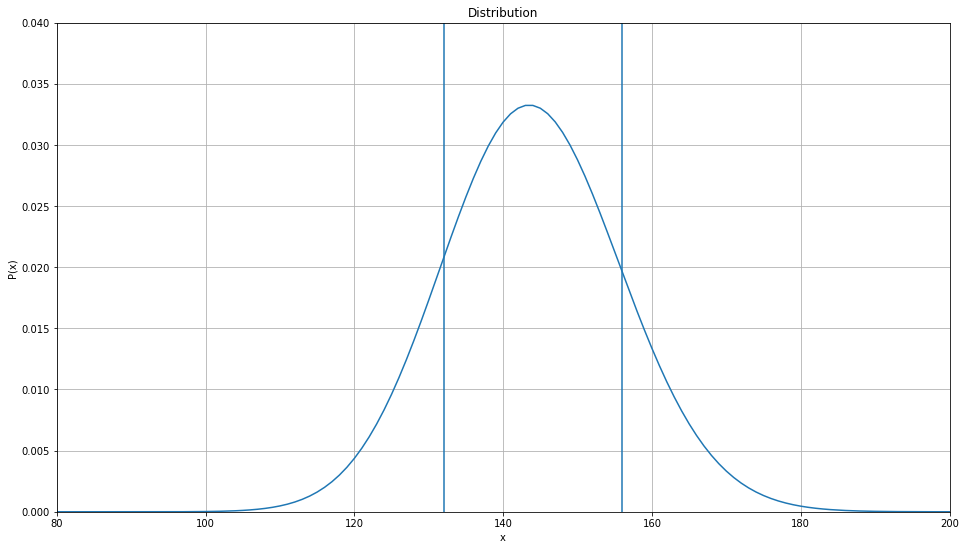

In [103]:
# check if values look ok
def fig_dist(x_max=300):
    x = np.arange(0, x_max)
    fig, ax = plt.subplots(figsize=(16, 9))

    plt.plot(x, [scipy.stats.poisson.pmf(i,(60*24)/10) for i in range(0,x_max)] )
    ax.axvline(144-12) # - std deviation
    ax.axvline(144+12) # + std deviation
    
    # tidy up the figure
    ax.grid(True)
    ax.set_title("Distribution") 
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")
    ax.set_xlim(80,200)
    ax.set_ylim(0,0.04)

    plt.show()

fig_dist()

In [108]:
mean_fee_per_block = (mean_revenue+std_revenue) / (mean_blocks_per_day-12 )
print('Change in fee accounting for std. deviation of blocks:\n฿ {:>20,.8f} BTC'.format(mean_fee_per_block))

Change in fee accounting for std. deviation of blocks:
฿           0.75549630 BTC


In [109]:
mean_fee_per_block = (mean_revenue+std_revenue) / mean_blocks_per_day 
print('Mean fee per block (derived by mean fee per day over the last year):\n฿ {:>20,.8f} BTC'.format(mean_fee_per_block))

Mean fee per block (derived by mean fee per day over the last year):
฿           0.69253828 BTC


In [110]:
mean_fee_per_block = (mean_revenue+std_revenue) / (mean_blocks_per_day+12)
print('Change in fee accounting for std. deviation of blocks:\n฿ {:>20,.8f} BTC'.format(mean_fee_per_block))

Change in fee accounting for std. deviation of blocks:
฿           0.63926610 BTC


In [114]:
max_fee_per_block = max_revenue / mean_blocks_per_day
print('Max fee per block (derived by max fee per day over the last year):\n฿ {:>20,.8f} BTC'.format(max_fee_per_block))

Max fee per block (derived by max fee per day over the last year):
฿           1.58691524 BTC


## Estimated rewards per day in BTC

In [122]:
current_block_reward_BTC = 12.5*10**8
print('current block reward:\n฿ {:>20,.8f} BTC'.format(current_block_reward_BTC*10**(-8)))

current block reward:
฿          12.50000000 BTC


In [123]:
mean_block_reward_per_day = (mean_blocks_per_day-12) * current_block_reward_BTC
print('mean - std. dev. current block reward per day:\n฿ {:>20,.8f} BTC'.format(mean_block_reward_per_day*10**(-8)))

mean - std. dev. current block reward per day:
฿       1,650.00000000 BTC


In [124]:
mean_block_reward_per_day = mean_blocks_per_day * current_block_reward_BTC
print('mean current block reward per day:\n฿ {:>20,.8f} BTC'.format(mean_block_reward_per_day*10**(-8)))

mean current block reward per day:
฿       1,800.00000000 BTC


In [125]:
mean_block_reward_per_day = (mean_blocks_per_day+12) * current_block_reward_BTC
print('mean + std. dev. current block reward per day:\n฿ {:>20,.8f} BTC'.format(mean_block_reward_per_day*10**(-8)))

mean + std. dev. current block reward per day:
฿       1,950.00000000 BTC
